In [0]:
import pandas as pd
import numpy as np
import scipy.stats as st

## Begin:

In [2]:
titanic_url_path = 'https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/13.%20Decision%20Trees/titanic.csv'
titanic_dataFrame = pd.read_csv(titanic_url_path)
titanic_dataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
to_drop = ['PassengerId',
          'Name',
          'Parch',
          'Ticket',
           'Cabin',
          'Embarked']

titanic_dataFrame.drop(columns=to_drop, inplace=True)

In [21]:
for x in titanic_dataFrame.columns:
    print(x)
    print(titanic_dataFrame[x].isnull().values.any())


#titanic_dataFrame['Age'].fillna(np.mean(titanic_dataFrame['Age']))

Survived
False
Pclass
False
Sex
False
Age
False
SibSp
False
Fare
False


In [0]:
titanic_dataFrame['Age'].fillna(np.mean(titanic_dataFrame['Age']), inplace=True)

-------------------------------------------------------------------------------------------------------------------------------

In [5]:
titanic_dataFrame.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [6]:
titanic_dataFrame.replace(['female','male'], [0,1], inplace=True)
titanic_dataFrame.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


In [0]:
x,y = titanic_dataFrame.iloc[:,1:],titanic_dataFrame.iloc[:,:1]

In [0]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x,y,test_size=0.4)

In [0]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [0]:
model = dtc(criterion='gini', random_state=1, max_depth=5)
model1 = dtc(criterion='gini', random_state=1, max_depth=10)

In [27]:
model.fit(x_train, y_train)
model1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

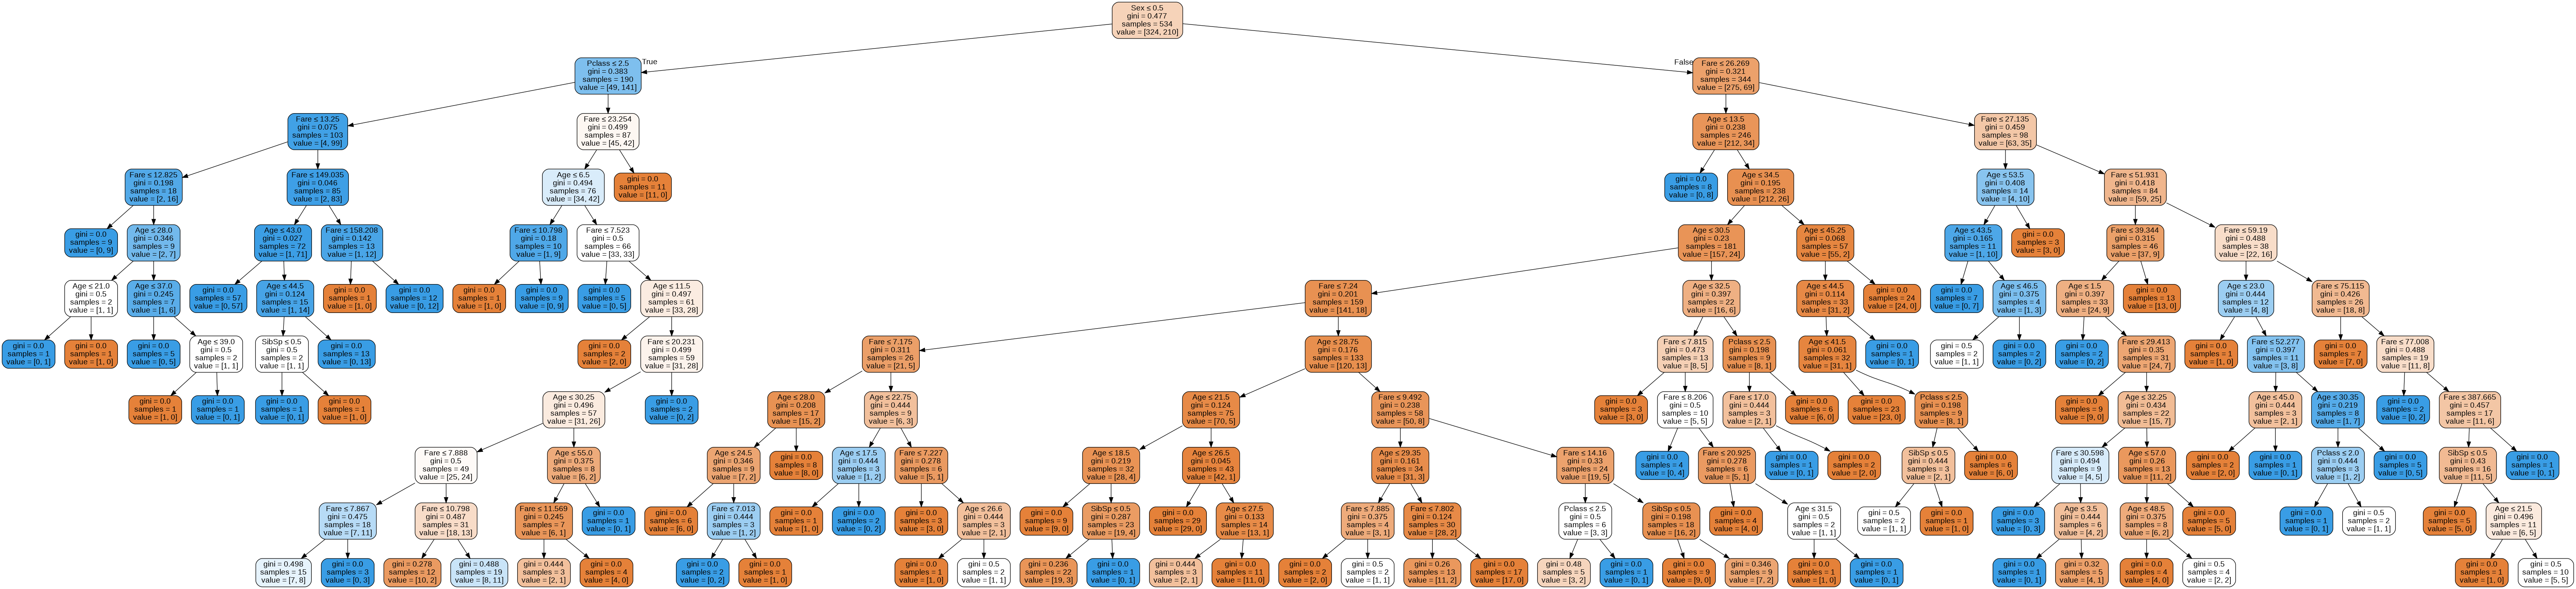

In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())